<a href="https://colab.research.google.com/github/Dhanhanjay/Gen-A-Thon/blob/main/Day1_IISc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

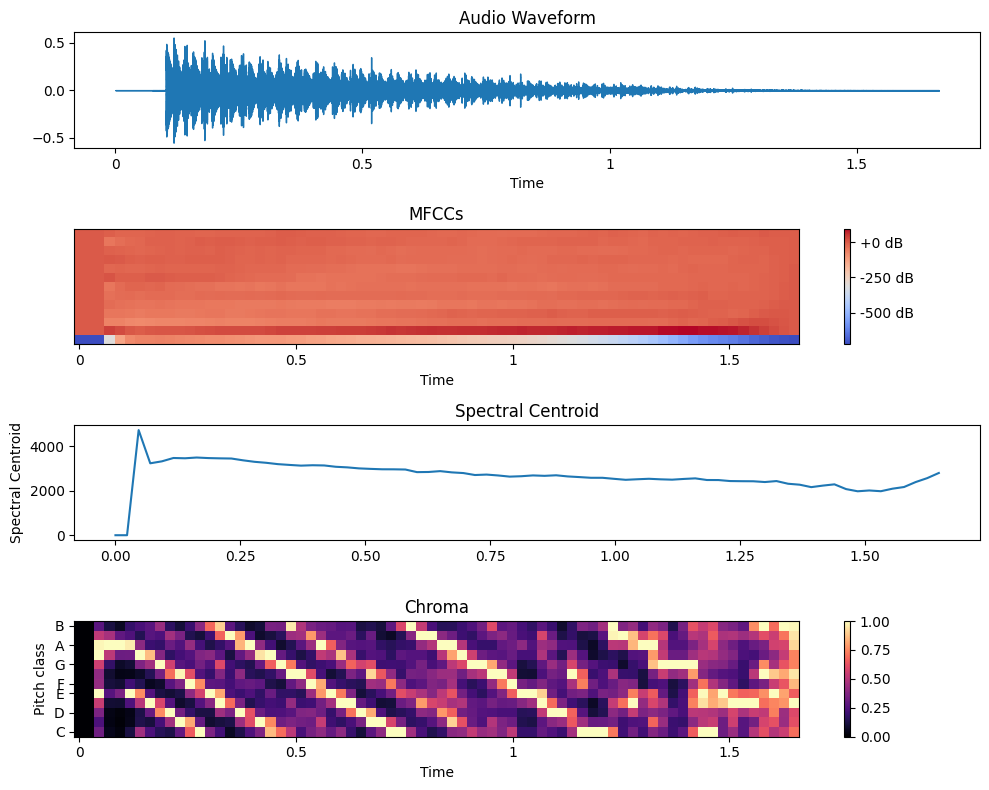

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# File path of the audio
audio_file_path = '/content/mixkit-arcade-retro-game-over-213.wav'  # Replace with your audio file path

# Load the audio file
audio_data, sr = librosa.load(audio_file_path)

# Extracting features using librosa
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sr)[0]
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)

# Plotting the audio waveform
plt.figure(figsize=(10, 8))

# Plotting the audio waveform
plt.subplot(4, 1, 1)
plt.title('Audio Waveform')
librosa.display.waveshow(audio_data, sr=sr)

# Plotting MFCCs
plt.subplot(4, 1, 2)
plt.title('MFCCs')
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')

# Plotting Spectral Centroid
plt.subplot(4, 1, 3)
plt.title('Spectral Centroid')
plt.plot(librosa.times_like(spectral_centroid), spectral_centroid)
plt.ylabel('Spectral Centroid')

# Plotting Chroma
plt.subplot(4, 1, 4)
plt.title('Chroma')
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()

plt.tight_layout()
plt.show()


Duration at which the first audio ended: 1.6666666666666667 seconds


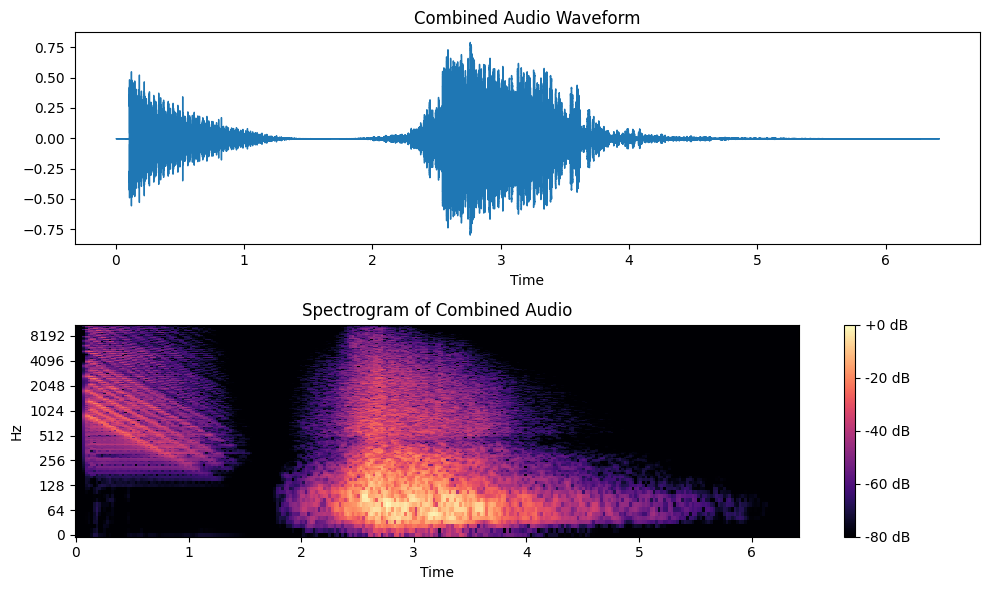

In [10]:



# File paths of the audio files
first_audio_path = '/content/mixkit-arcade-retro-game-over-213.wav'  # Replace with the path to your first audio file
second_audio_path = '/content/mixkit-fast-rocket-whoosh-1714.wav'  # Replace with the path to your second audio file

# Load the audio files
audio_data_1, sr_1 = librosa.load(first_audio_path)
audio_data_2, sr_2 = librosa.load(second_audio_path)

# Concatenate the audio files
if sr_1 != sr_2:
    print("Sampling rates of the audio files are different. Resampling...")
    audio_data_2 = librosa.resample(audio_data_2, sr_2, sr_1)
    sr_2 = sr_1  # Update the sampling rate

combined_audio = np.concatenate((audio_data_1, audio_data_2))

# Find the duration of the first audio file
duration_first_audio = librosa.get_duration(y=audio_data_1, sr=sr_1)

print(f"Duration at which the first audio ended: {duration_first_audio} seconds")

# Plotting the combined audio waveform
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title('Combined Audio Waveform')
librosa.display.waveshow(combined_audio, sr=sr_1)

# Plotting the spectrogram of the combined audio
plt.subplot(2, 1, 2)
plt.title('Spectrogram of Combined Audio')
spec = np.abs(librosa.stft(combined_audio))
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), sr=sr_1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()


In [22]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# File paths of the two audio files
first_audio_path = '/content/mixkit-arcade-retro-game-over-213.wav'  # Replace with the path to your first audio file
second_audio_path = '/content/mixkit-fast-rocket-whoosh-1714.wav'  # Replace with the path to your second audio file

# Load the audio files
audio_data_1, sr_1 = librosa.load(first_audio_path)
audio_data_2, sr_2 = librosa.load(second_audio_path)

# Extract features from the first audio file
mfccs_1 = librosa.feature.mfcc(y=audio_data_1, sr=sr_1, n_mfcc=13)
spectral_centroid_1 = librosa.feature.spectral_centroid(y=audio_data_1, sr=sr_1)[0]
chroma_1 = librosa.feature.chroma_stft(y=audio_data_1, sr=sr_1)

# Extract features from the second audio file
mfccs_2 = librosa.feature.mfcc(y=audio_data_2, sr=sr_2, n_mfcc=13)
spectral_centroid_2 = librosa.feature.spectral_centroid(y=audio_data_2, sr=sr_2)[0]
chroma_2 = librosa.feature.chroma_stft(y=audio_data_2, sr=sr_2)

# Combine the audio files
combined_audio = np.concatenate((audio_data_1, audio_data_2))

# Extract features from the combined audio
mfccs_combined = librosa.feature.mfcc(y=combined_audio, sr=sr_1, n_mfcc=13)
spectral_centroid_combined = librosa.feature.spectral_centroid(y=combined_audio, sr=sr_1)[0]
chroma_combined = librosa.feature.chroma_stft(y=combined_audio, sr=sr_1)

# Find the duration at which the first audio ends based on the features
# For example, using MFCCs duration analysis
mfccs_length_1 = mfccs_1.shape[1]
mfccs_length_2 = mfccs_2.shape[1]
mfccs_combined_length = mfccs_combined.shape[1]

if mfccs_length_1 < mfccs_combined_length:
    duration_first_audio = librosa.frames_to_time(mfccs_length_1, sr=sr_1)
    print(f"Duration at which the first audio ended: {duration_first_audio} seconds")
else:
    print("Unable to detect the end of the first audio.")



Duration at which the first audio ended: 1.6718367346938776 seconds


44100


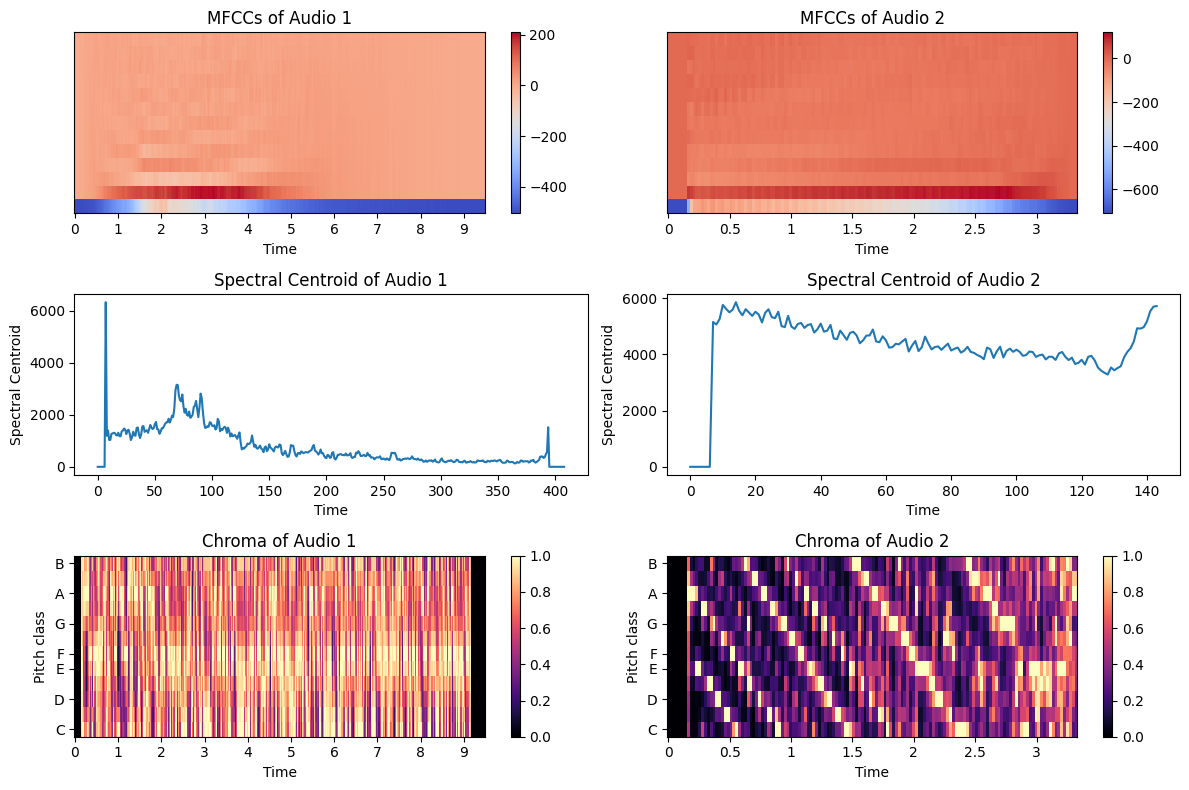

Duration at which Audio 2 started playing: 0.06965986394557823 seconds


In [41]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# File paths of the two audio files
audio1_path = '/content/mixkit-fast-rocket-whoosh-1714.wav'  # Replace with the path to your first audio file
audio2_path = '/content/mixkit-arcade-retro-game-over-213.wav'  # Replace with the path to your second audio file

# Load the audio files
audio1, sr1 = librosa.load(audio1_path, sr=None)
audio2, sr2 = librosa.load(audio2_path, sr=None)
print(sr1)
# Extract features from audio 1
mfccs_1 = librosa.feature.mfcc(y=audio1, sr=sr1, n_mfcc=13)
spectral_centroid_1 = librosa.feature.spectral_centroid(y=audio1, sr=sr1)[0]
chroma_1 = librosa.feature.chroma_stft(y=audio1, sr=sr1)

# Extract features from audio 2
mfccs_2 = librosa.feature.mfcc(y=audio2, sr=sr2, n_mfcc=13)
spectral_centroid_2 = librosa.feature.spectral_centroid(y=audio2, sr=sr2)[0]
chroma_2 = librosa.feature.chroma_stft(y=audio2, sr=sr2)

# Plotting features of audio 1
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.title('MFCCs of Audio 1')
librosa.display.specshow(mfccs_1, x_axis='time')
plt.colorbar()

plt.subplot(3, 2, 3)
plt.title('Spectral Centroid of Audio 1')
plt.plot(spectral_centroid_1)
plt.ylabel('Spectral Centroid')
plt.xlabel('Time')

plt.subplot(3, 2, 5)
plt.title('Chroma of Audio 1')
librosa.display.specshow(chroma_1, y_axis='chroma', x_axis='time')
plt.colorbar()

# Plotting features of audio 2
plt.subplot(3, 2, 2)
plt.title('MFCCs of Audio 2')
librosa.display.specshow(mfccs_2, x_axis='time')
plt.colorbar()

plt.subplot(3, 2, 4)
plt.title('Spectral Centroid of Audio 2')
plt.plot(spectral_centroid_2)
plt.ylabel('Spectral Centroid')
plt.xlabel('Time')

plt.subplot(3, 2, 6)
plt.title('Chroma of Audio 2')
librosa.display.specshow(chroma_2, y_axis='chroma', x_axis='time')
plt.colorbar()

plt.tight_layout()
plt.show()

# Combine the audios
start_sample_2 = int(0.5 * sr1)  # Duration of first audio to be played before audio 2

combined_audio = np.concatenate((audio1[:start_sample_2], audio2, audio1[start_sample_2:]))

# Extract features from the combined audio
mfccs_combined = librosa.feature.mfcc(y=combined_audio, sr=sr1, n_mfcc=13)
spectral_centroid_combined = librosa.feature.spectral_centroid(y=combined_audio, sr=sr1)[0]
chroma_combined = librosa.feature.chroma_stft(y=combined_audio, sr=sr1)

# Find the duration when audio 2 starts playing based on features
centroid_diff_combined = np.diff(spectral_centroid_combined)

# Detect the start of audio 2
start_indices_2 = np.where(centroid_diff_combined > np.mean(centroid_diff_combined))[0]
if len(start_indices_2) > 0:
    start_index_2 = start_indices_2[0]
    duration_audio2_start = librosa.frames_to_time(start_index_2, sr=sr1)
    print(f"Duration at which Audio 2 started playing: {duration_audio2_start} seconds")
else:
    print("Unable to detect the start of Audio 2.")
